In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from ls.config.loader import load_config

In [3]:
# --- 1. load config ---
cfg = load_config("../configs/config.yaml")

print("Dataset config:", cfg.dataset)
print("Audio config:", cfg.audio)

Dataset config: {'name': 'icbhi', 'data_folder': '/home/AIoT04/Datasets/icbhi_dataset', 'class_split': 'lungsound', 'split_strategy': 'official', 'test_fold': 0, 'n_cls': 4, 'weighted_sampler': True, 'batch_size': 32, 'num_workers': 0, 'h': 128, 'w': 1024}
Audio config: {'sample_rate': 16000, 'desired_length': 10.0, 'pad_type': 'repeat', 'use_fade': True, 'fade_samples_ratio': 64, 'n_mels': 128, 'frame_length': 25, 'frame_shift': 10, 'low_freq': 100, 'high_freq': 8000, 'window_type': 'hanning', 'use_energy': False, 'dither': 0.0, 'mel_norm': 'mit', 'resz': 1.0, 'raw_augment': 1, 'wave_aug': [{'type': 'Crop', 'sampling_rate': 16000, 'zone': [0.0, 1.0], 'coverage': 1.0, 'p': 0.0}, {'type': 'Noise', 'color': 'white', 'p': 0.0}, {'type': 'Speed', 'factor': [0.9, 1.1], 'p': 0.0}, {'type': 'Loudness', 'factor': [0.5, 2.0], 'p': 0.1}, {'type': 'VTLP', 'sampling_rate': 16000, 'zone': [0.0, 1.0], 'fhi': 4800, 'factor': [0.9, 1.1], 'p': 0.1}, {'type': 'Pitch', 'sampling_rate': 16000, 'factor': [

In [4]:
from ls.data.icbhi import ICBHIDataset

In [5]:
# --- 2. Instantiate datasets ---
train_ds = ICBHIDataset(
    cfg.dataset,
    cfg.audio,
    train=True, transform=None, mean_std=False, print_info=True
)
print(train_ds)

/storage/data/iotlab/AIoT/konto/envs/icbhi-ast/lib/python3.11/site-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/storage/data/iotlab/AIoT/konto/envs/icbhi-ast/lib/python3.11/site-packages/torchaudio/_backend/ffmpeg.py:88: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https:/

[ICBHI] Extracted 4142 respiratory cycles from 539 recordings
[ICBHI] Input spectrogram shape: (998, 128, 1)
[ICBHI] 4142 cycles (base cycles only, aug handled dynamically)
  Class 0: 2063 (49.8%)
  Class 1: 1215 (29.3%)
  Class 2: 501 (12.1%)
  Class 3: 363 (8.8%)
[ICBHI] Active waveform augmentations: Loudness, VTLP
[ICBHI] Active spectrogram augmentations: SpecAugment
[ICBHI] Expected P(augmented) ≈ 0.43 (~1793/4142 per epoch)
ICBHIDataset(train=True, n_samples=4142, input_shape=(998, 128), n_wave_augs=2, n_spec_augs=1)


In [11]:
# --- 2. Instantiate datasets ---
test_ds  = ICBHIDataset(cfg.dataset, cfg.audio, train=False, transform=None, mean_std=False, print_info=True)
print(test_ds)

/opt/homebrew/Caskroom/miniconda/base/envs/icbhi-ast/lib/python3.11/site-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(


[ICBHI] Extracted 2756 respiratory cycles from 381 recordings
[ICBHI] Input spectrogram shape: (997, 128, 1)
[ICBHI] 2756 cycles (base cycles only, aug handled dynamically)
  Class 0: 1579 (57.3%)
  Class 1: 649 (23.5%)
  Class 2: 385 (14.0%)
  Class 3: 143 (5.2%)
[ICBHI] No waveform augmentations
[ICBHI] No spectrogram augmentations
ICBHIDataset(train=False, n_samples=2756, input_shape=(997, 128), n_wave_augs=0, n_spec_augs=0)


In [12]:
print(len(train_ds) + len(test_ds))

6898


In [6]:
idx = np.random.randint(len(train_ds))
sample = train_ds[1281]

mel_spec = sample["input_values"]
print(mel_spec.shape)

torch.Size([1, 128, 998])


In [7]:
import IPython.display as ipd

721
Keys: dict_keys(['input_values', 'labels', 'audio', 'label', 'filename', 'cycle_index', 'duration', 'start_time', 'end_time', 'crackle', 'wheeze', 'fbank', 'aug_audio', 'aug_fbank'])
Filename: 130_1p2_Lr_mc_AKGC417L
Cycle index: 5
Label: 3
Duration: 2.714
Start-End: 14.316 - 17.03
Crackle/Wheeze: 1 1
Waveform shape: torch.Size([1, 160000])
Mel image shape: torch.Size([1, 128, 998])


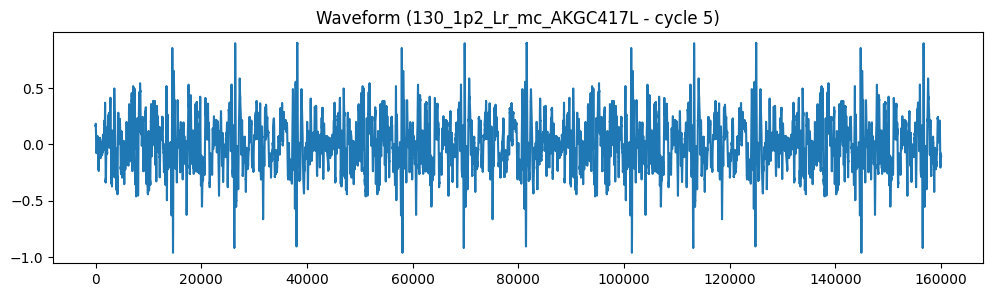

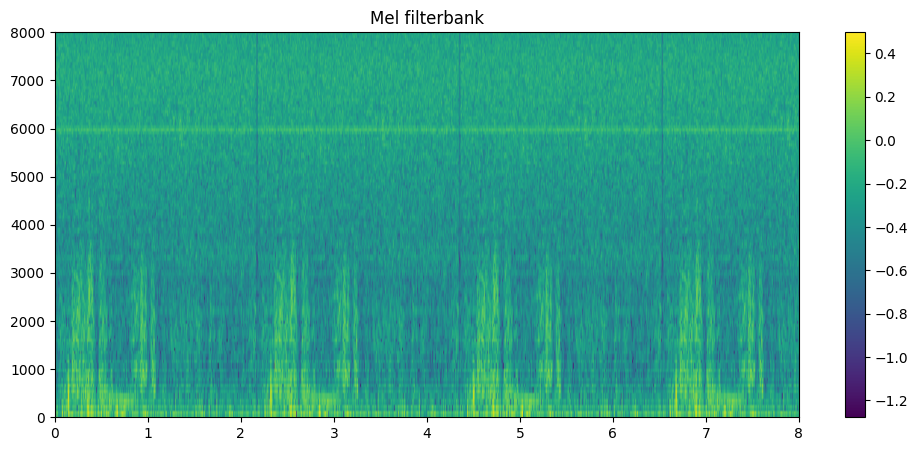

In [18]:
# --- 3. Inspect one sample ---
idx = np.random.randint(len(train_ds))
# sample = train_ds[1281]
sample = train_ds[idx]
print(idx)
print("Keys:", sample.keys())
print("Filename:", sample["filename"])
print("Cycle index:", sample["cycle_index"])
print("Label:", sample["label"])
print("Duration:", sample["duration"])
print("Start-End:", sample["start_time"], "-", sample["end_time"])
print("Crackle/Wheeze:", sample["crackle"], sample["wheeze"])
# print(sample["aug_audio"].shape, sample["aug_fbank"].shape, sample["audio"].shape, sample["fbank"].shape)
print("Waveform shape:", sample["audio"].shape)
print("Mel image shape:", sample["input_values"].shape)

def tensors_equal(a, b, atol=1e-6, rtol=1e-5):
    return torch.allclose(a, b, atol=atol, rtol=rtol)

# print(sample['fbank'].shape, sample['aug_fbank'].shape)
# print(f"Waveform augmented: {not tensors_equal(sample['audio'].view(-1), sample['aug_audio'].view(-1))}")
# print(f"Mel augmented: {not tensors_equal(sample['fbank'].view(-1), sample['aug_fbank'].view(-1))}")

# --- 4. Plot waveform ---
waveform = sample["audio"].squeeze().numpy()
plt.figure(figsize=(12, 3))
plt.plot(waveform)
plt.title(f"Waveform ({sample['filename']} - cycle {sample['cycle_index']})")
plt.show()

# --- 5. Plot mel spectrogram ---
mel = sample["input_values"].squeeze(0) # .T  # [time, freq] for imshow
plt.figure(figsize=(12, 5))
plt.imshow(mel, origin="lower", aspect="auto", extent=[0, 8, 0, 8000], cmap="viridis")
plt.title("Mel filterbank")
plt.colorbar()
plt.show()

ipd.Audio(waveform, rate=cfg.audio.sample_rate)  # listen to the sound

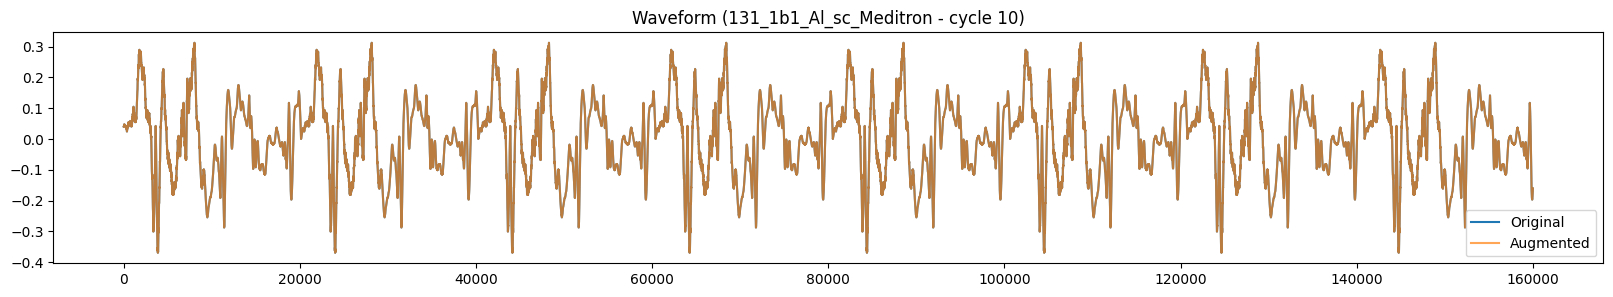

In [21]:
orig_padded_audio = sample["audio"].squeeze().numpy()
aug_padded_audio = sample["aug_audio"].squeeze().numpy()

plt.figure(figsize=(20, 3))
plt.plot(orig_padded_audio[:int(10*cfg.audio.sample_rate)], label="Original")
plt.plot(aug_padded_audio[:int(10*cfg.audio.sample_rate)], label="Augmented", alpha=0.7)
plt.title(f"Waveform ({sample['filename']} - cycle {sample['cycle_index']})")
plt.legend()
plt.show()

ipd.display(ipd.Audio(orig_padded_audio, rate=cfg.audio.sample_rate))
ipd.display(ipd.Audio(aug_padded_audio, rate=cfg.audio.sample_rate))